# **MOVIE RATING PREDICTION WITH PYTHON**

In [1]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Try reading the CSV file with ISO-8859-1 encoding
try:
    data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/CODSOFT_DataScience/MOVIE RATING/IMDb Movies India.csv", encoding='ISO-8859-1')
    print("File read successfully with ISO-8859-1 encoding")
except UnicodeDecodeError:
    print("ISO-8859-1 encoding failed, trying cp1252")

    # If ISO-8859-1 fails, try cp1252 encoding
    try:
        data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/CODSOFT_DataScience/MOVIE RATING/IMDb Movies India.csv", encoding='cp1252')
        print("File read successfully with cp1252 encoding")
    except UnicodeDecodeError:
        print("Both encodings failed. Please check the file encoding or try another encoding.")


File read successfully with ISO-8859-1 encoding


In [3]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.shape

(15509, 10)

In [5]:
import pandas as pd

def missing_values_summary(df):
    # Calculate total missing values
    total_missing = df.isnull().sum()

    # Calculate percentage of missing values
    percentage_missing = (total_missing / len(df)) * 100

    # Create a summary DataFrame
    missing_summary = pd.DataFrame({
        'Column': df.columns,
        'Total Missing Values': total_missing,
        'Percentage Missing': percentage_missing
    })

    # Filter out columns with no missing values
    missing_summary = missing_summary[missing_summary['Total Missing Values'] > 0]

    # Reset index
    missing_summary.reset_index(drop=True, inplace=True)

    return missing_summary


missing_summary = missing_values_summary(data)
missing_summary


,Column,Total Missing Values,Percentage Missing
0,Year,528,3.404475
1,Duration,8269,53.317429
2,Genre,1877,12.102650
3,Rating,7590,48.939326
4,Votes,7589,48.932878
5,Director,525,3.385131
6,Actor 1,1617,10.426204
7,Actor 2,2384,15.371720
8,Actor 3,3144,20.272100


In [6]:
import pandas as pd

def drop_missing_ratings(df):
    df_cleaned = df.dropna(subset=['Rating'])
    return df_cleaned
data = drop_missing_ratings(data)
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [7]:
missing_summary = missing_values_summary(data)
missing_summary

,Column,Total Missing Values,Percentage Missing
0,Duration,2068,26.114408
1,Genre,102,1.288041
2,Director,5,0.063139
3,Actor 1,125,1.578482
4,Actor 2,200,2.525571
5,Actor 3,292,3.687334


In [8]:
data.shape

(7919, 10)

In [9]:
import pandas as pd

def fill_missing_categorical_with_mode(df):
    # Iterate through each column in the DataFrame
    for col in df.select_dtypes(include=['object', 'category']).columns:
        # Calculate the mode of the column
        mode_value = df[col].mode()[0]
        # Fill missing values with the mode
        df[col].fillna(mode_value, inplace=True)

    return df


data = fill_missing_categorical_with_mode(data)
missing_summary = missing_values_summary(data)
missing_summary

,Column,Total Missing Values,Percentage Missing


In [10]:
import pandas as pd

def unique_values_summary(df):
    # Initialize lists to store the summary information
    columns = []
    unique_values = []
    total_unique_values = []

    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Append column name
        columns.append(col)
        # Get unique values for the column
        unique_vals = df[col].unique()
        unique_values.append(unique_vals)
        # Get the total number of unique values
        total_unique_values.append(len(unique_vals))

    # Create a summary DataFrame
    unique_summary = pd.DataFrame({
        'Column': columns,
        'Unique Values': unique_values,
        'Total Unique Values': total_unique_values
    })

    return unique_summary

unique_summary = unique_values_summary(data)
unique_summary


,Column,Unique Values,Total Unique Values
0,Name,"[#Gadhvi (He thought he was Gandhi), #Yaaram, ...",7372
1,Year,"[(2019), (1997), (2005), (2012), (2014), (2004...",92
2,Duration,"[109 min, 110 min, 147 min, 142 min, 82 min, 1...",178
3,Genre,"[Drama, Comedy, Romance, Comedy, Drama, Musica...",432
4,Rating,"[7.0, 4.4, 4.7, 7.4, 5.6, 4.0, 6.2, 5.9, 6.5, ...",84
5,Votes,"[8, 35, 827, 1,086, 326, 11, 17, 59, 983, 512,...",2033
6,Director,"[Gaurav Bakshi, Ovais Khan, Rahul Rawail, Shoo...",3139
7,Actor 1,"[Rasika Dugal, Prateik, Bobby Deol, Jimmy Shei...",2551
8,Actor 2,"[Vivek Ghamande, Ishita Raj, Aishwarya Rai Bac...",2873
9,Actor 3,"[Arvind Jangid, Siddhant Kapoor, Shammi Kapoor...",3064


In [11]:
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [12]:
import pandas as pd

def extract_year(df, column_name):
    # Use a regular expression to extract the year and convert to integer
    df[column_name] = df[column_name].str.extract(r'\((\d{4})\)').astype(int)

    return df

data = extract_year(data, 'Year')
data


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,120 min,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,120 min,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [13]:
import pandas as pd

def extract_duration_minutes(df, column_name):
    # Remove the ' min' part and convert to integer
    df[column_name] = df[column_name].str.replace(' min', '').astype(int)
    return df

# Extract duration in minutes
data = extract_duration_minutes(data, 'Duration')
data


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,120,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,120,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [14]:
data['Genre'].head(20)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
15                Comedy, Drama
18       Comedy, Drama, Romance
21        Crime, Drama, Mystery
22             Horror, Thriller
25               Comedy, Horror
28       Drama, Horror, Mystery
30                        Drama
32                        Drama
33             Action, Thriller
34                       Action
Name: Genre, dtype: object

In [15]:
import pandas as pd

def extract_first_genre(df, column_name):
    # Split the genre string by comma and select the first genre
    df[column_name] = df[column_name].apply(lambda x: x.split(',')[0].strip())

    return df
# Extract first genre
data = extract_first_genre(data, 'Genre')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,Drama,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,120,Action,5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125,Action,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,120,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [16]:
unique_summary = unique_values_summary(data)
unique_summary

,Column,Unique Values,Total Unique Values
0,Name,"[#Gadhvi (He thought he was Gandhi), #Yaaram, ...",7372
1,Year,"[2019, 1997, 2005, 2012, 2014, 2004, 2016, 199...",92
2,Duration,"[109, 110, 147, 142, 82, 116, 96, 120, 161, 16...",178
3,Genre,"[Drama, Comedy, Horror, Action, Crime, Thrille...",20
4,Rating,"[7.0, 4.4, 4.7, 7.4, 5.6, 4.0, 6.2, 5.9, 6.5, ...",84
5,Votes,"[8, 35, 827, 1,086, 326, 11, 17, 59, 983, 512,...",2033
6,Director,"[Gaurav Bakshi, Ovais Khan, Rahul Rawail, Shoo...",3139
7,Actor 1,"[Rasika Dugal, Prateik, Bobby Deol, Jimmy Shei...",2551
8,Actor 2,"[Vivek Ghamande, Ishita Raj, Aishwarya Rai Bac...",2873
9,Actor 3,"[Arvind Jangid, Siddhant Kapoor, Shammi Kapoor...",3064


In [17]:
pip install wordcloud matplotlib


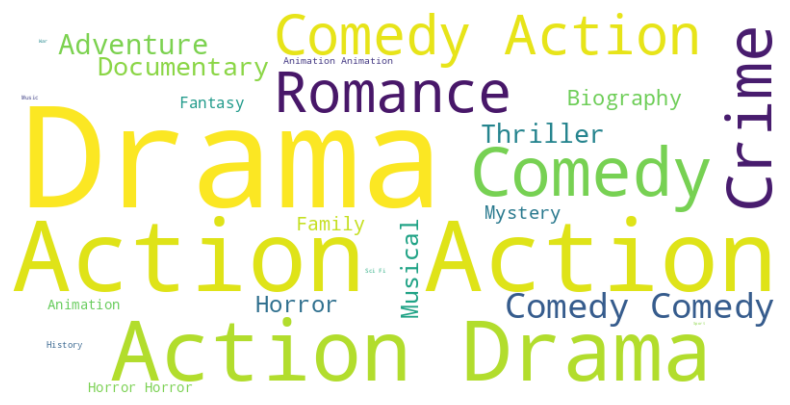

In [18]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_word_cloud(df, column_name):
    # Combine all text from the column into a single string
    text = ' '.join(df[column_name].dropna().astype(str))

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.show()
show_word_cloud(data, 'Genre')


In [19]:
import pandas as pd

def derive_hours_from_minutes(df, duration_column):
    # Derive 'hours' column by dividing duration in minutes by 60
    df['Hours'] = df[duration_column] / 60
    return df
# Derive 'hours' column
data = derive_hours_from_minutes(data, 'Duration')
data


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Hours
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1.816667
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1.833333
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,2.450000
6,...Yahaan,2005,142,Drama,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,2.366667
8,?: A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,1.366667
...,...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,120,Action,5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,2.000000
15503,Zulm Ki Zanjeer,1989,125,Action,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,2.083333
15504,Zulm Ko Jala Doonga,1988,120,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,2.000000
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,2.150000


In [20]:
data.columns
data.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
Hours       float64
dtype: object

In [21]:
data=data[['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Hours']]

In [22]:
import pandas as pd

def convert_column_to_numeric(df, column_name, errors='raise'):

    df[column_name] = pd.to_numeric(df[column_name], errors=errors)
    return df
data = convert_column_to_numeric(data, 'Votes', errors='coerce')
data.dtypes

<ipython-input-22-a4377cd22dc2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_numeric(df[column_name], errors=errors)


Year          int64
Duration      int64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
Hours       float64
dtype: object

In [23]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.4 MB/s eta 0:00:00


In [25]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def train_catboost_regressor(df, target_column, categorical_columns=[]):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize CatBoost regressor with categorical features
    regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, random_state=42, verbose=0,
                                  cat_features=categorical_columns)

    # Fit the regressor to the training data
    regressor.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = regressor.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    return regressor

# Example usage
# Assuming 'data' is your DataFrame, 'target' is the target column for regression,
# and 'categorical_columns' is a list of categorical column names
trained_regressor = train_catboost_regressor(data, 'Rating', categorical_columns=['Genre', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'])


Mean Squared Error: 1.1679785134276843
Root Mean Squared Error (RMSE): 1.080730546171285
